# Can McDonalds be healthy?

In this analysis I will try to find the answer on given question, using exploratory data analysis and dietary knowledge.

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels as stat 

## Importing dataset and clearing the data

In [123]:
mcdonalds_df = pd.read_csv('menu.csv')

mcdonalds_df.head()

calories_columns = ['Calories', 'Calories from Fat']
mcdonalds_df = mcdonalds_df.loc[(mcdonalds_df[calories_columns] != 0 ).any(axis = 1)]

mcdonalds_df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [124]:
def check_nulls():
    if mcdonalds_df.isnull().any().any() == True: #This strange condition is due to dimensions of dataFrame in Pandas
        print('YES')
    else:
        print('No')

check_nulls()

No


This data set is very cleared and prepared for further analysis

In [125]:
list(mcdonalds_df.Category.unique())

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

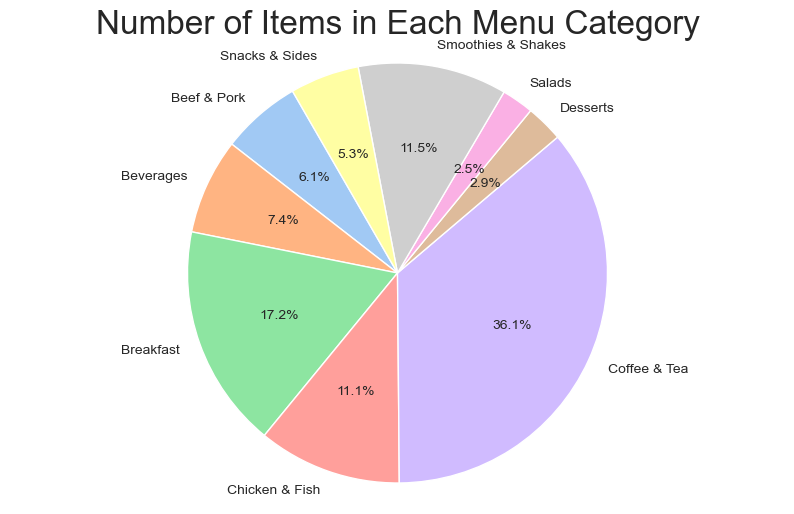

In [126]:
# Tworzymy dane do wykresu kołowego
categories_number = mcdonalds_df['Category'].value_counts().sort_index()

# Tworzymy wykres kołowy
plt.figure(figsize=(10, 6))
plt.pie(categories_number, labels=categories_number.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Ustawiamy skalę tak, aby wykres był okrągły
plt.title('Number of Items in Each Menu Category', fontsize = 24)

plt.show()

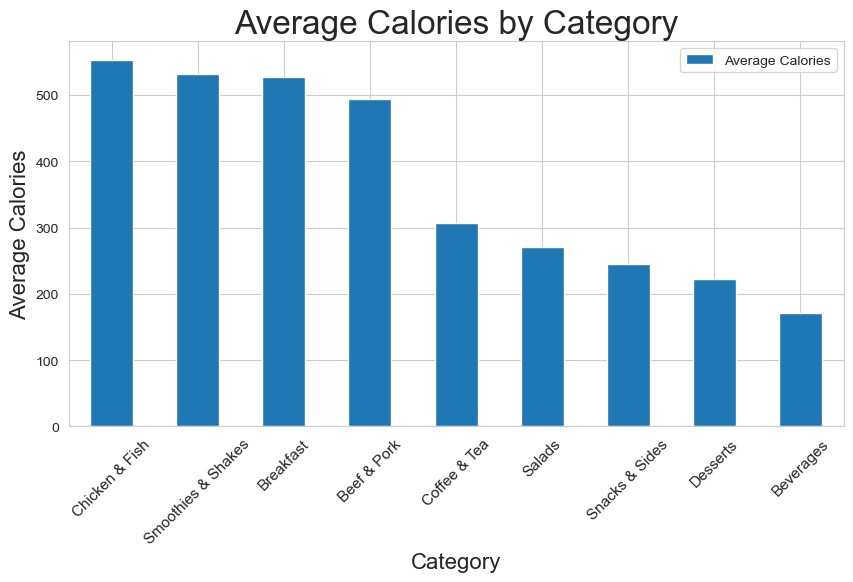

In [149]:
avg_calories_by_category = mcdonalds_df[['Category', 'Calories']].groupby('Category').mean().sort_values('Calories', ascending=False)

avg_calories_by_category = avg_calories_by_category.rename(columns={'Calories': 'Average Calories'})

avg_calories_by_category.plot(kind='bar', figsize=(10, 5))
plt.title('Average Calories by Category', fontsize = 24)
plt.xlabel('Category', fontsize = 16)
plt.ylabel('Average Calories', fontsize = 16)
plt.xticks(rotation=45, fontsize = 11)  # Rotating x label to be more readable
plt.show()

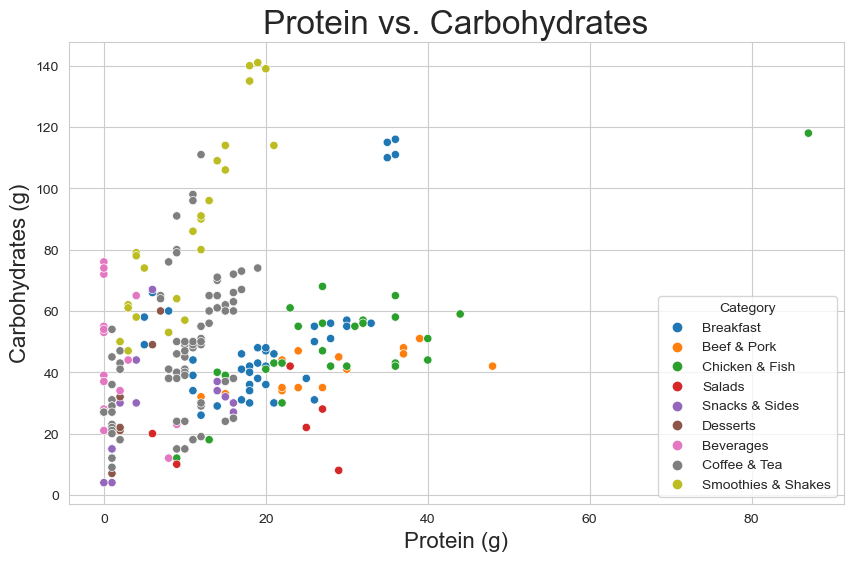

In [150]:
plt.subplots(figsize = (10,6))
sns.scatterplot(x='Protein',hue = 'Category', y='Carbohydrates', data=mcdonalds_df)

# set the title and x and y axis labels
plt.title('Protein vs. Carbohydrates', fontsize = 24)
plt.xlabel('Protein (g)', fontsize = 16)
plt.ylabel('Carbohydrates (g)', fontsize = 16)

# show the plot
plt.show()

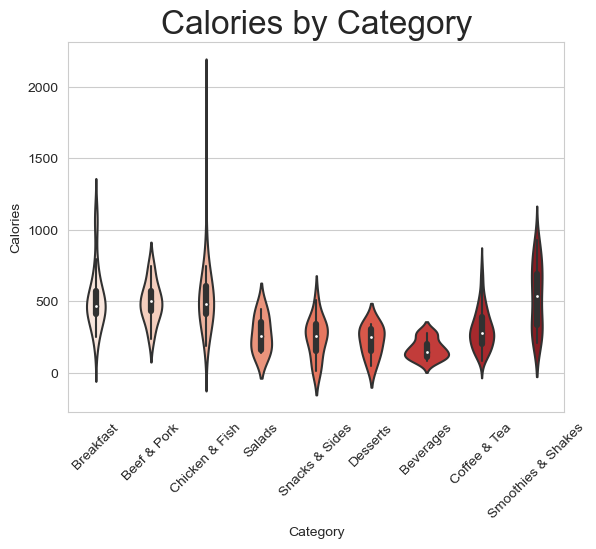

In [152]:
sns.violinplot(x='Category', y='Calories', data=mcdonalds_df, palette='Reds')
plt.xticks(rotation=45)
plt.title('Calories by Category', fontsize = 24)
plt.show()

C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

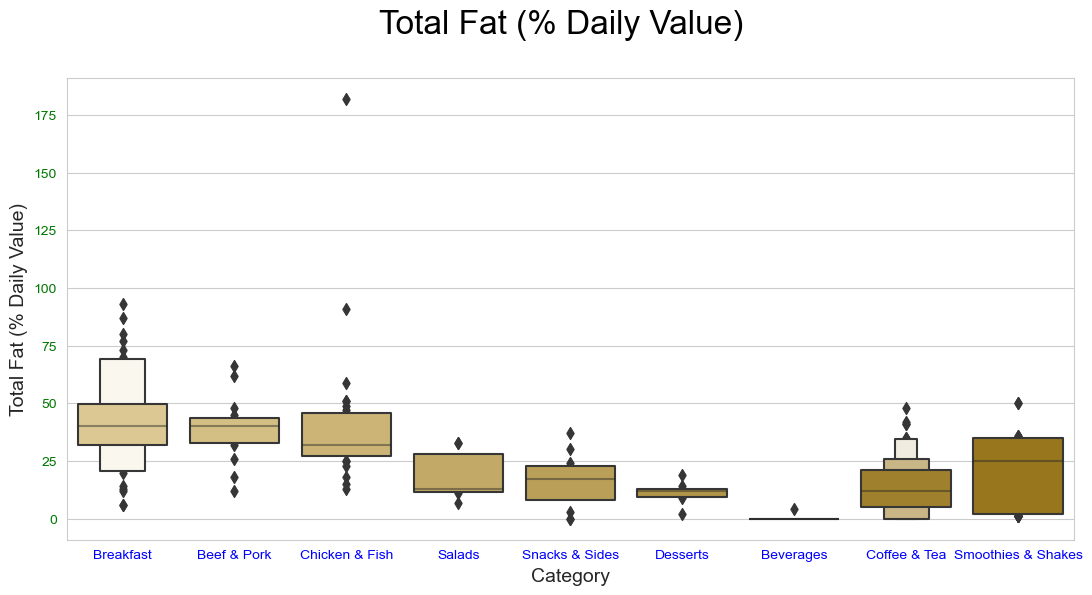

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,6))

plot = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=mcdonalds_df, palette=sns.color_palette("blend:#e8ce87,#ab7f09", 9))


plt.title("Total Fat (% Daily Value)  \n", loc="center", size=24, color='black')
plt.xlabel('Category', fontsize = 14) 
plt.ylabel('Total Fat (% Daily Value)',fontsize = 14)
plt.xticks(color='blue',rotation='horizontal', wrap=True)  
plt.yticks(color='#007700')
plt.show()

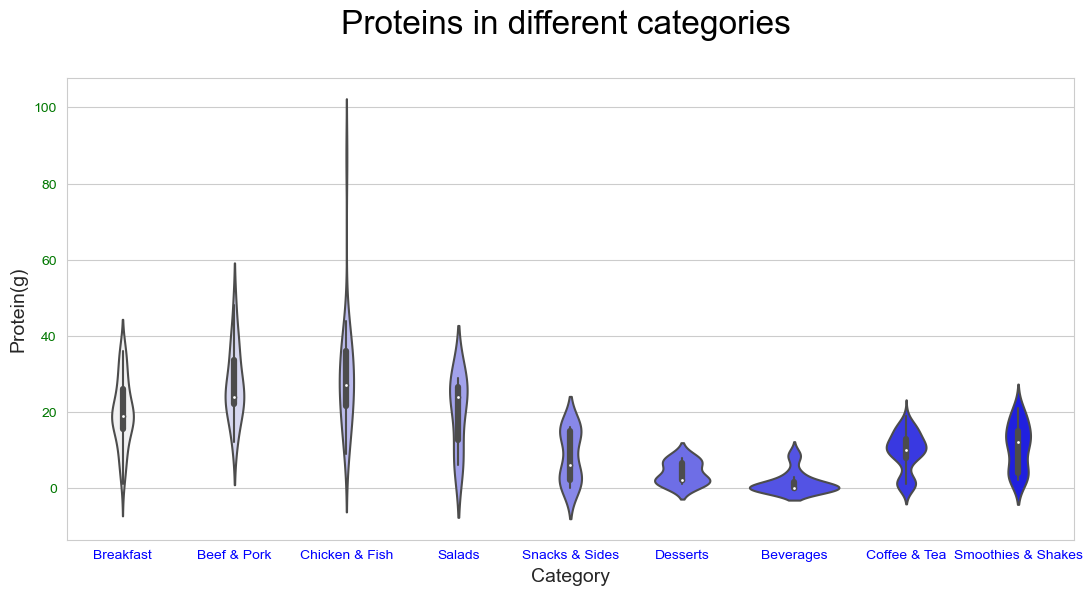

In [131]:
plt.figure(figsize=(13,6))

plot = sns.violinplot(x="Category", y='Protein', data=mcdonalds_df, palette=sns.light_palette("blue", 9))

plt.title("Proteins in different categories \n", loc="center", size=24, color='black')
plt.xlabel('Category', fontsize = 14) 
plt.ylabel('Protein(g)',fontsize = 14)
plt.xticks(color='blue',rotation='horizontal', wrap=True)  
plt.yticks(color='#007700')
plt.show()

C:\Users\Tomek\AppData\Local\Temp\ipykernel_3684\1098257913.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  plot = sns.stripplot(x="Category", y='Vitamin A (% Daily Value)', data=mcdonalds_df, palette=sns.dark_palette("orange", 9))
C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tomek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tomek\AppData\Local\Temp\ipykernel_3684\1098257913.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  plot = sns.stripplot(x="Category", y='Vitamin C (% Daily Value)

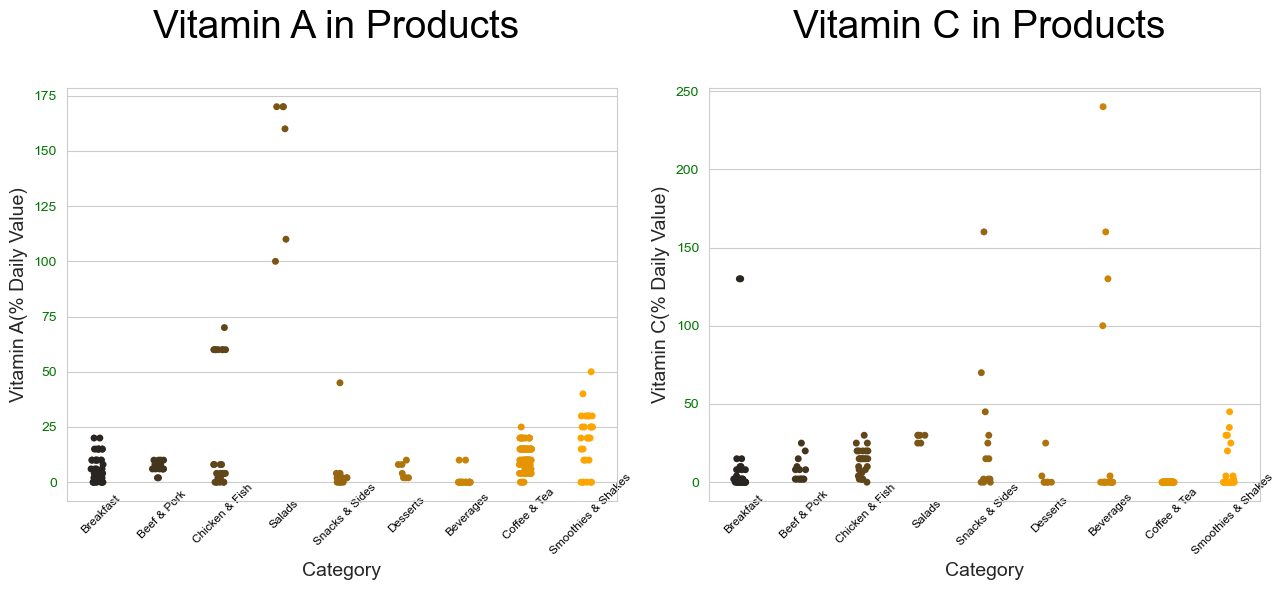

In [132]:
plt.figure(figsize=(13,6))

plt.subplot(1, 2, 1)
plot = sns.stripplot(x="Category", y='Vitamin A (% Daily Value)', data=mcdonalds_df, palette=sns.dark_palette("orange", 9))

plt.title("Vitamin A in Products \n", loc="center", size=28, color='black')
plt.xlabel('Category', fontsize = 14) 
plt.ylabel('Vitamin A(% Daily Value)',fontsize = 14)
plt.xticks(color='black',rotation=45, wrap=True, fontsize=8.5)  
plt.yticks(color='#007700')

plt.subplot(1,2,2)
plot = sns.stripplot(x="Category", y='Vitamin C (% Daily Value)', data=mcdonalds_df, palette=sns.dark_palette("orange", 9))

plt.title("Vitamin C in Products \n", loc="center", size=28, color='black')
plt.xlabel('Category', fontsize = 14) 
plt.ylabel('Vitamin C(% Daily Value)',fontsize = 14)
plt.xticks(color='black',rotation=45, wrap=True, fontsize=8.5)  
plt.yticks(color='#007700')

plt.tight_layout()
plt.show()

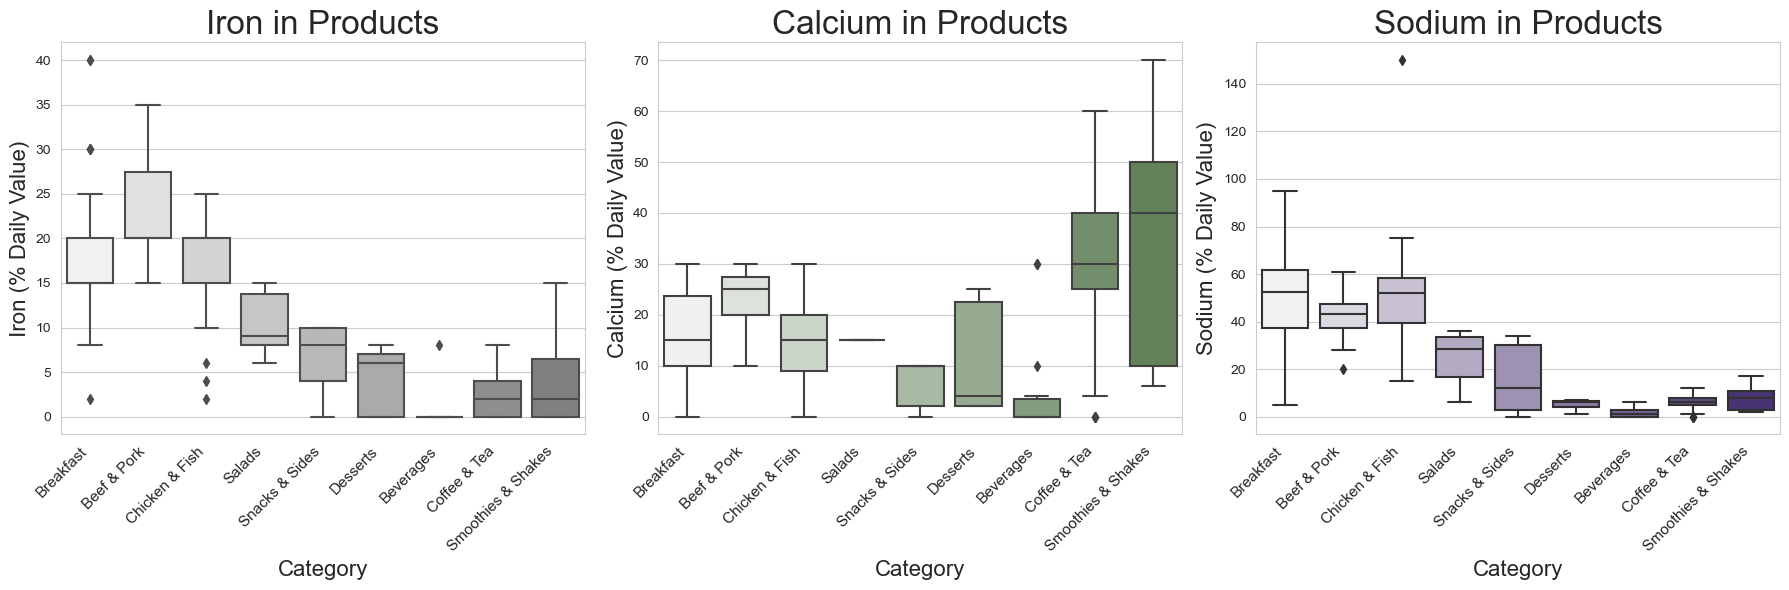

In [133]:
plt.figure(figsize=(18,6))

# Wykres boxplot dla żelaza (Iron)
plt.subplot(1, 3, 1)
sns.boxplot(x='Category', y='Iron (% Daily Value)', data=mcdonalds_df, palette=sns.light_palette("grey", 9))
plt.title('Iron in Products', size=24)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Iron (% Daily Value)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

# Wykres boxplot dla wapnia (Calcium)
plt.subplot(1, 3, 2)
sns.boxplot(x='Category', y='Calcium (% Daily Value)', data=mcdonalds_df, palette=sns.light_palette("#5f8755", 9))
plt.title('Calcium in Products', size=24)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Calcium (% Daily Value)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

# Wykres boxplot dla sodu (Sodium)
plt.subplot(1, 3, 3)
sns.boxplot(x='Category', y='Sodium (% Daily Value)', data=mcdonalds_df, palette=sns.light_palette("#462a7d", 9))
plt.title('Sodium in Products', size=24)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Sodium (% Daily Value)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.tight_layout()
plt.show()


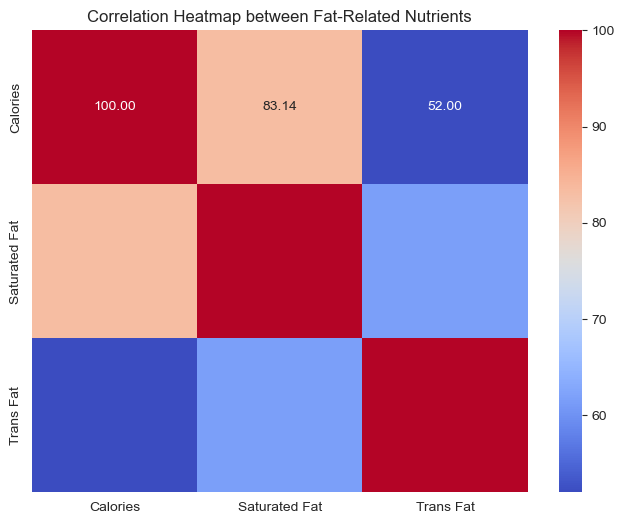

In [134]:
# Matrix of correlation
corr_matrix = mcdonalds_df[['Calories', 'Saturated Fat', 'Trans Fat']].corr()
corr_matrix_percent = corr_matrix * 100

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_percent, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Fat-Related Nutrients')
plt.show()

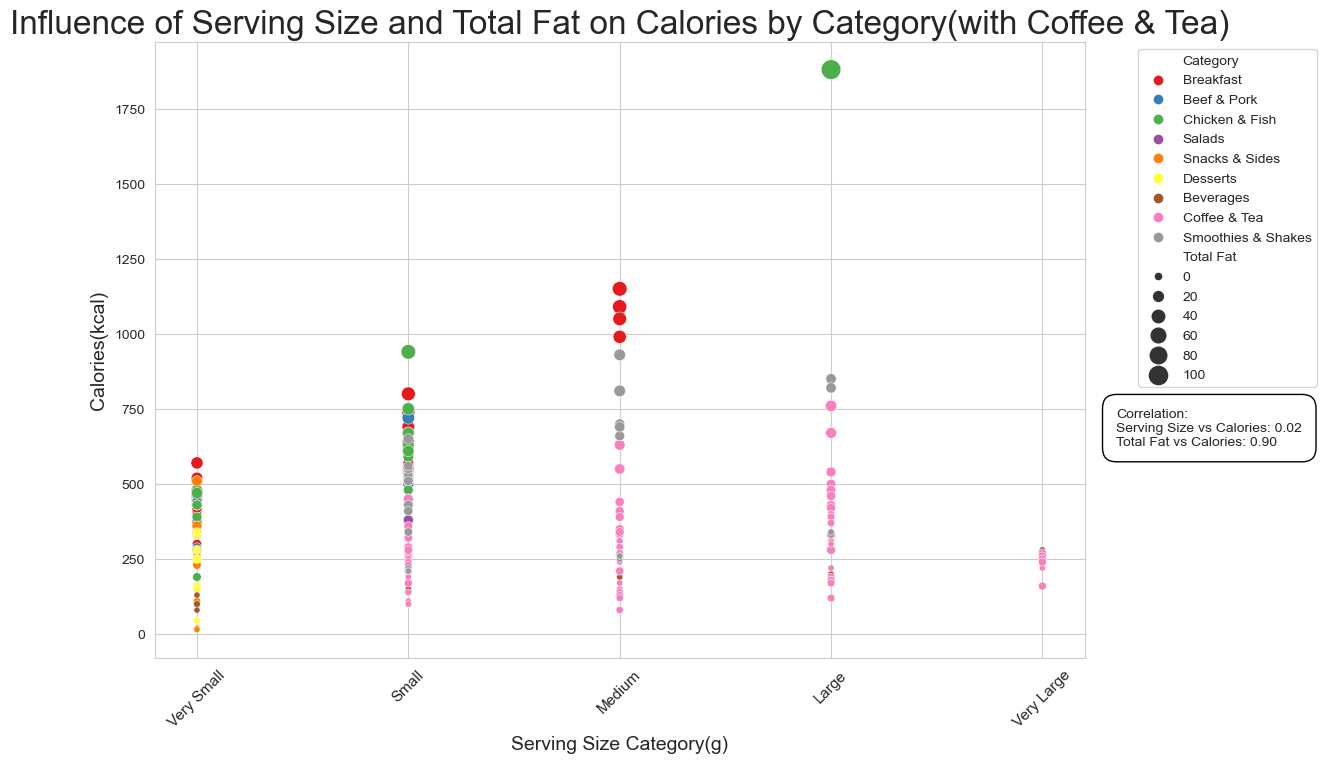

In [146]:
# Ekstrakcja wartości w gramach
grams = mcdonalds_df['Serving Size'].str.extract('(\d+) g').astype(float)

# Ekstrakcja wartości w uncjach płynu (fl oz) i przeliczenie na gramy
fluid_ounces = mcdonalds_df['Serving Size'].str.extract('(\d+) fl oz').astype(float)
grams_from_fluid_ounces = fluid_ounces * 29.57  # Przeliczenie na gramy

# Połączenie wartości w gramach z obu ekstrakcji
mcdonalds_df['Serving Size (g)'] = grams.fillna(0) + grams_from_fluid_ounces.fillna(0)

# Podzielmy wielkość porcji na 5 przedziałów
mcdonalds_df['Serving Size Category'] = pd.cut(mcdonalds_df['Serving Size (g)'], bins=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Serving Size Category', y='Calories', hue='Category', size='Total Fat', data=mcdonalds_df, palette='Set1', sizes=(20, 200))
plt.title('Influence of Serving Size and Total Fat on Calories by Category(with Coffee & Tea)', fontsize = 24)
plt.xlabel('Serving Size Category(g)', fontsize = 14)
plt.ylabel('Calories(kcal)', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize = 11) 

# Obliczamy współczynnik korelacji Pearsona
correlation = mcdonalds_df[['Serving Size (g)', 'Total Fat', 'Calories']].corr()

# Wyświetlamy wartości korelacji na wykresie
plt.text(4.35, 630, f"Correlation:\nServing Size vs Calories: {correlation.iloc[0,2]:.2f}\nTotal Fat vs Calories: {correlation.iloc[1,2]:.2f}", fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.show()

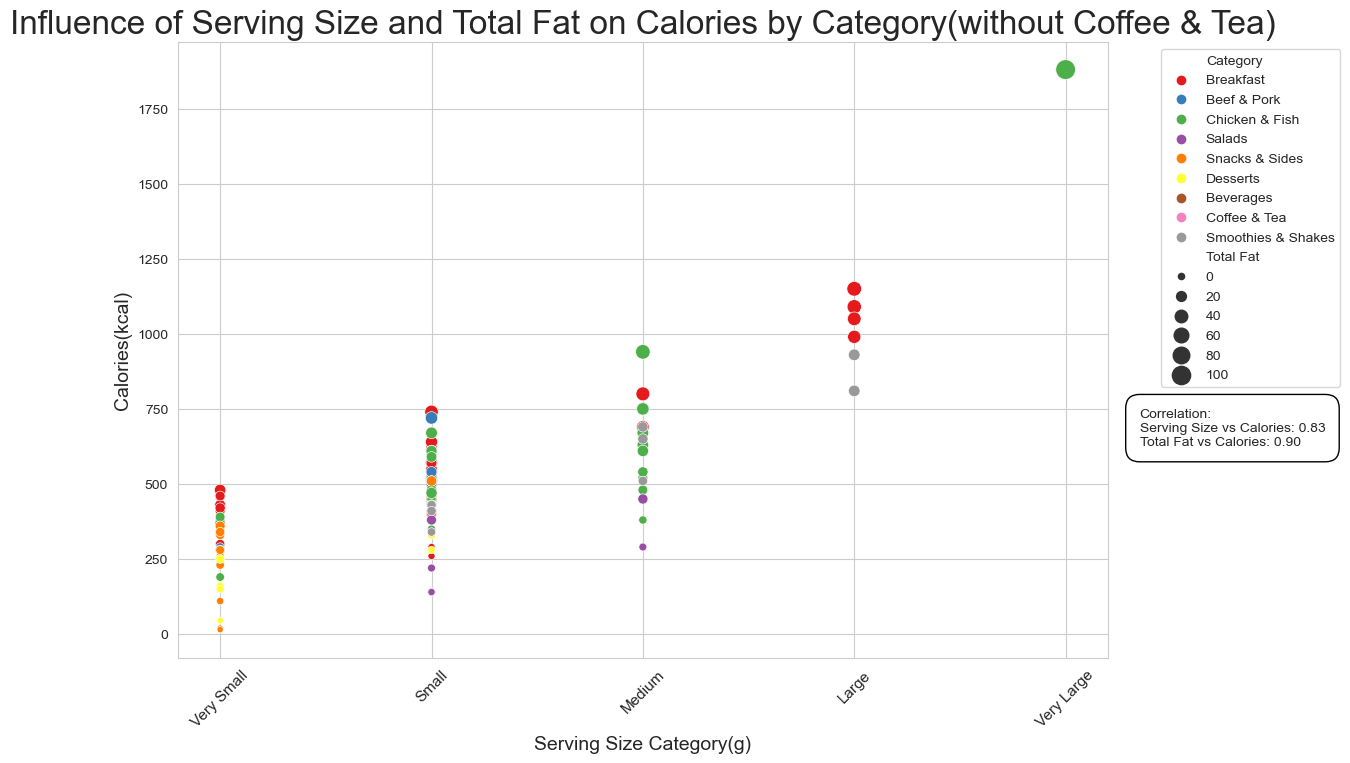

In [148]:
mcdonalds_df['Serving Size (g)'] = mcdonalds_df['Serving Size'].str.extract('(\d+) g').astype(float)

# Podzielmy wielkość porcji na 8 przedziałów
mcdonalds_df['Serving Size Category'] = pd.cut(mcdonalds_df['Serving Size (g)'], bins=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Serving Size Category', y='Calories', hue='Category', size='Total Fat', data=mcdonalds_df, palette='Set1', sizes=(20, 200))
plt.title('Influence of Serving Size and Total Fat on Calories by Category(without Coffee & Tea)', fontsize = 24)
plt.xlabel('Serving Size Category(g)', fontsize = 14)
plt.ylabel('Calories(kcal)', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize = 11) 

# Obliczamy współczynnik korelacji Pearsona
correlation = mcdonalds_df[['Serving Size (g)', 'Total Fat', 'Calories']].corr()

# Wyświetlamy wartości korelacji na wykresie
plt.text(4.35, 630, f"Correlation:\nServing Size vs Calories: {correlation.iloc[0,2]:.2f}\nTotal Fat vs Calories: {correlation.iloc[1,2]:.2f}", fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.show()